- Regression
- Classification

In [1]:
# 배열, 행렬
import numpy as np

# 그래프 그려주는 패키지
import matplotlib.pyplot as plt

## Regression (회귀)

어떠한 데이터가 있을 때, 그 데이터를 이용하여 추세선을 그어 예측하는 방법

### 선형회귀

In [2]:
# 선형회귀 함수 불러오기
from sklearn.linear_model import LinearRegression

In [3]:
# 데이터셋 x, y
x = np.linspace(0,10,100)
y = 3*x + 3*np.random.randn(100)

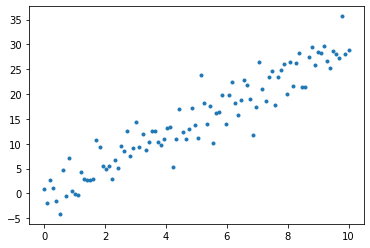

In [4]:
# (x,y) 의 데이터들 입력
plt.plot(x, y, ".")
plt.show()

In [5]:
# 선형회귀 적용
# linreg 선형회귀 형태 적용
linreg = LinearRegression()

In [6]:
# (x,y) 데이터들 적용
linreg.fit(x.reshape(100,1),y)

LinearRegression()

In [7]:
# 예측 값
linreg.predict([[30]])

array([90.38108099])

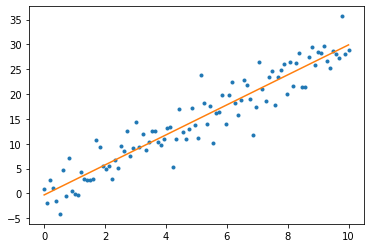

In [8]:
plt.plot(x,y,".")
plt.plot(x,linreg.predict(x.reshape(100,1)))
plt.show()

선 부분이 예측 값들이다.

### classification (분류)

데이터들을 분석해서 범주에 따라 분류하는 과정

예) 범주 : 고양이, 강아지, 새

데이터 : 크기, 무게, 색, ... 

데이터들을 가지고 고양이인지 강아지인지 구분하는 과정

In [9]:
# enumerate 사용법
A = [2,3,4,6,7]

# i는 0,1,2,3,4,5 
# j는 A[0],A[1], ... 이렇게 루프 돌음

for i, j in enumerate(A):
    print(i, j)

0 2
1 3
2 4
3 6
4 7


In [10]:
# 데이터셋 만들기
# 데이터 : (x,y) 위치들

np.random.seed(22)

# 데이터 (문제)
point=[]

# 범주 (답)
label= []
center = 6*np.random.randn(4,2)

answers = ["1번답", "2번답", "3번답", "4번답"]

for index, center in enumerate(center):
    
    for i in range(200):
        x = center[0]+np.random.randn()
        y = center[1]+np.random.randn()
        point.append([x,y])
        label.append(answers[index])

In [11]:
# 각각 배열이 묶인형태임. 하나로 묶어줘야함
# point[:2] = point[0],point[1]
point[:2]

[[0.0747939371249301, -9.341617697433747],
 [-0.5228444008710953, -9.010871104575472]]

In [12]:
# 병합해주기
point = np.stack(point,axis=0)
label = np.stack(label,axis=0)

In [13]:
# 여러개의 배열이 하나의 배열로 됨 이 과정이 없으면 오류남
point[:2]

array([[ 0.07479394, -9.3416177 ],
       [-0.5228444 , -9.0108711 ]])

In [14]:
label[:2]

array(['1번답', '1번답'], dtype='<U3')

In [15]:
point.shape, label.shape

((800, 2), (800,))

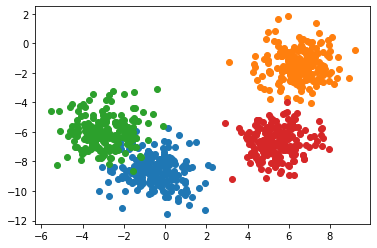

In [16]:
# 데이터셋 1번답, 2번답, 3번답, 4번답
# 그래프로 표현
for answer in answers:
    mask = label == answer
    plt.scatter(point[mask,0], point[mask,1])
    
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(point, label)
pred = logreg.predict(point)

In [18]:
pred[:2]

array(['1번답', '1번답'], dtype='<U3')

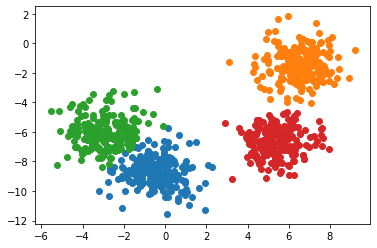

In [19]:
# 로지스틱 회귀를 이용한 예상 값
for answer in answers:
    mask = pred == answer
    plt.scatter(point[mask,0], point[mask,1])
plt.show()

경계선 부분에서는 예측하기 어려움

In [20]:
# 맞춘 확률 구하기
num = label == pred
num.sum() / len(num) * 100

97.625

In [22]:
point.shape

(800, 2)

In [54]:
x, y =np.hsplit(point, 2)

In [55]:
x.min(), x.max()

(-5.5560759447306935, 9.20918512633976)

In [56]:
y.min(), y.max()

(-11.54963687156813, 1.8298309870888083)

In [57]:
test_x = np.linspace(x.min(), x.max(), 100)
test_y = np.linspace(y.min(), y.max(), 100)

In [68]:
test_set = []
for x in test_x :
    for y in test_y :
        test_set.append([x,y])

In [69]:
test_set = np.stack(test_set, axis=0)

In [74]:
test_set.shape

(10000, 2)

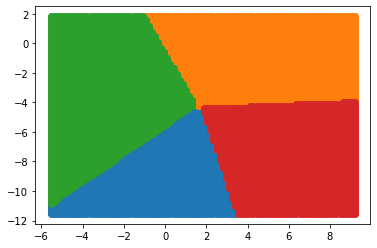

In [75]:
# 로지스틱 회귀를 이용한 예상 값
pred = logreg.predict(test_set)
for answer in answers:
    mask = pred == answer
    plt.scatter(test_set[mask,0], test_set[mask,1])
plt.show()